In [9]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# read VDjdb dataset
VDJdb_cluster = pd.read_csv("cluster_members.txt", sep = "\t")
display(VDJdb_cluster)
#VDJdb.head(60)

,species,antigen.epitope,antigen.gene,antigen.species,mhc.a,mhc.b,mhc.class,gene,cdr3aa,x,y,cid,csz,v.segm,j.segm,v.end,j.start,v.segm.repr,j.segm.repr
0,HomoSapiens,ALSKGVHFV,ORF3,SARS-CoV-2,HLA-A*02:01,B2M,MHCI,TRB,CASSLAGDNYNEQFF,-39.726852,-33.281632,H.B.ALSKGVHFV.1,5,TRBV27*01,TRBJ2-1*01,5,9,TRBV27*01,TRBJ2-1*01
1,HomoSapiens,ALSKGVHFV,ORF3,SARS-CoV-2,HLA-A*02:01,B2M,MHCI,TRB,CASSLAGDSYNEQFF,24.412303,-30.361080,H.B.ALSKGVHFV.1,5,TRBV27*01,TRBJ2-1*01,5,8,TRBV27*01,TRBJ2-1*01
2,HomoSapiens,ALSKGVHFV,ORF3,SARS-CoV-2,HLA-A*02:01,B2M,MHCI,TRB,CASSLSGDDYNEQFF,-41.623109,96.607424,H.B.ALSKGVHFV.1,5,TRBV27*01,TRBJ2-1*01,5,9,TRBV27*01,TRBJ2-1*01
3,HomoSapiens,ALSKGVHFV,ORF3,SARS-CoV-2,HLA-A*02:01,B2M,MHCI,TRB,CASSLVGDSYNEQFF,85.273584,-68.632074,H.B.ALSKGVHFV.1,5,TRBV27*01,TRBJ2-1*01,5,8,TRBV27*01,TRBJ2-1*01
4,HomoSapiens,ALSKGVHFV,ORF3,SARS-CoV-2,HLA-A*02:01,B2M,MHCI,TRB,CASSLAGDDYNEQFF,-20.353842,27.931498,H.B.ALSKGVHFV.1,5,TRBV27*01,TRBJ2-1*01,5,9,TRBV27*01,TRBJ2-1*01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,MusMusculus,TVYGFCLL,m139,MCMV,H-2Kb,B2M,MHCI,TRA,CALIMNYNQGKLIF,-59.604162,249.330229,M.A.TVYGFCLL.1,12,TRAV12D-1*01,TRAJ23*01,3,5,TRAV12D-1*01,TRAJ23*01
8837,MusMusculus,TVYGFCLL,m139,MCMV,H-2Kb,B2M,MHCI,TRA,CALIPNYNQGKLIF,21.841948,250.486690,M.A.TVYGFCLL.1,12,TRAV12D-1*01,TRAJ23*01,3,5,TRAV12D-1*01,TRAJ23*01
8838,MusMusculus,TVYGFCLL,m139,MCMV,H-2Kb,B2M,MHCI,TRA,CALRENYNQGKLIF,18.122508,110.798302,M.A.TVYGFCLL.1,12,TRAV12-3*01,TRAJ23*01,3,5,TRAV12D-1*01,TRAJ23*01
8839,MusMusculus,TVYGFCLL,m139,MCMV,H-2Kb,B2M,MHCI,TRA,CALRMNYNQGKLIF,-53.234524,176.612272,M.A.TVYGFCLL.1,12,TRAV12D-1*01,TRAJ23*01,3,5,TRAV12D-1*01,TRAJ23*01


In [11]:
# To define two methods to plot the umap dimension reduction results.
def draw_scatter(epitope, UMAP_fit, label):
    class_list = np.unique(epitope)  # 21个label
    n_class = len(class_list)  # label类别数
    palette = sns.hls_palette(n_colors=n_class)  # 配色方案
    plt.figure(figsize=(8, 8))
    
    for idx, species in enumerate(class_list):  # 遍历每个类别
        # 获取颜色和点型
        color = palette[idx]
        #marker = marker_list[idx % len(marker_list)]
        # 找到所有标注类别为当前类别的图像索引号
        indices = np.where(epitope == species)
        plt.scatter(UMAP_fit[indices, 0], UMAP_fit[indices, 1], color=color, label=label.iloc[species,0], s=30)  # , s=150
    plt.legend(fontsize=10, markerscale=1, bbox_to_anchor=(1, 1))
    
    
def label_gen(data):
    VDJ_test = data
    epitope = VDJ_test['antigen.species']
    epitope = pd.Categorical(epitope).codes
    spec_label_rep = pd.DataFrame({"antitope":data['antigen.species'], "label":epitope})
    spec_label = spec_label_rep.drop_duplicates(keep='first')
    spec_label = spec_label.sort_values("label")
    #display(TRA_spec_label)
    return spec_label, epitope

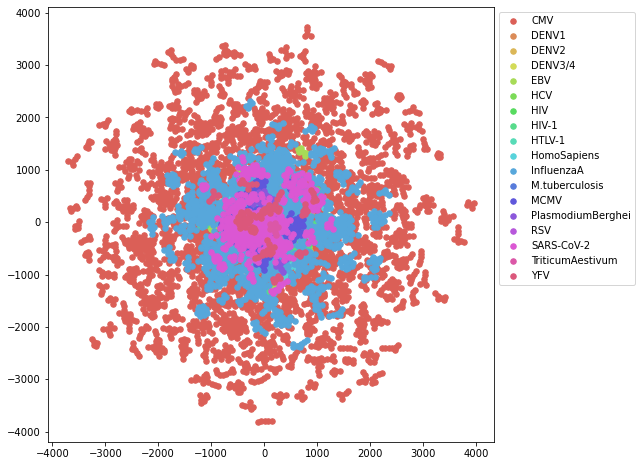

In [12]:
cluster_position = VDJdb_cluster[["x", "y"]].to_numpy()

spec_label, epitope = label_gen(VDJdb_cluster)

draw_scatter(epitope, cluster_position, spec_label)
#plt.scatter(cluster_position[:,0], cluster_position[:,1])

### VDJdb columns explanation
gene column contains TRA and TRB, TRA means TCR alpha subunit, TRB means TCR beta subunit. 

cdr3 column is the segment to join the TRA and TRB together.  

v.segm and j.segm columns is part of TRA or TRB.  

sepecies column is represent where is gene from, here is HomoSapiens, also called human(All of us).

Before explaning columns, we need to know what is MHC. MHC means Major histocompatibility complex, which contail 2 classes.
MHC I class and MHC II class (Here is mhc.class, MHCI and MHCII). Both classes of proteins share the task of presenting peptides on the cell surface for recognition by T cells.There is a set of alleles that will determine the protein type and form of MHCI(Here, mhc.a and mhc.b is expressed from alleles gene regions(Maybe, i am not sure)), more details please click https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5355494/#:~:text=Major%20histocompatibility%20complex%20(MHC)%20class%20I%20and%20class%20II%20proteins,for%20recognition%20by%20T%20cells.

mhc.a and mhc.b columns is one gene expression based on mhc.class.  

mhc.class column is to specify a class the gene belong to.  

antigen.epitope column , also known as antigenic determinant, is the part of an antigen that is recognized by the immune system, specifically by antibodies, B cells, or T cells. The part of an antibody that binds to the epitope is called a paratope.  

antigen.species columns is show us where is the paratope or epitope from, here the mhc's paratope from HIV-1.  
 
More columns details, Please click: https://github.com/antigenomics/vdjdb-db

In [13]:
# read VDjdb dataset
VDJdb = pd.read_csv("vdjdb.txt", sep = "\t")
#display(VDJdb)
VDJdb.head(60)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...",2,sort,sanger,yes,yes
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no
9,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEQGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no


In [3]:
# read VDJdb full dataset
VDJdb_full = pd.read_csv("vdjdb_full.txt", sep = "\t", low_memory=False)
display(VDJdb_full)

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,NaN,"{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60050,NaN,NaN,NaN,CASSDWGSAETLYF,TRBV13-3*01,NaN,TRBJ2-3*01,MusMusculus,H-2Db,B2M,...,KL83_CB6F1_#5_21714KL,NaN,NaN,NaN,H2d/b,NaN,NaN,NaN,"{""cdr3"": ""CASSDWGSAETLYF"", ""cdr3_old"": ""CASSDW...",0
60051,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,NaN,NaN,NaN,NaN,MusMusculus,H-2Db,B2M,...,KL136_CB6F1_#5_TRA_271114,NaN,NaN,NaN,H2d/b,NaN,NaN,"{""cdr3"": ""CAARGYNQGKLIF"", ""cdr3_old"": ""CAARGYN...",NaN,1
60052,CATSDTNAYKVIF,TRAV8-2*01,TRAJ30*01,NaN,NaN,NaN,NaN,MusMusculus,H-2Db,B2M,...,KL136_CB6F1_#5_TRA_271114,NaN,NaN,NaN,H2d/b,NaN,NaN,"{""cdr3"": ""CATSDTNAYKVIF"", ""cdr3_old"": ""CATSDTN...",NaN,1
60053,CALSDTGANTGKLTF,TRAV6-5*01,TRAJ52*01,NaN,NaN,NaN,NaN,MusMusculus,H-2Db,B2M,...,KL136_CB6F1_#5_TRA_271114,NaN,NaN,NaN,H2d/b,NaN,NaN,"{""cdr3"": ""CALSDTGANTGKLTF"", ""cdr3_old"": ""CALSD...",NaN,0


Based on my understanding of the original data and its background knowledge. Its useful data are listed as (cdr3.alpha, v.alpha, j.alpha, cdr3.beta, v.beta, d.beta, j.beta, species).  
Our second step is to derive the similarity matrix from the useful sequence data by means of a library of functions such as TCRDist. For documentation on the TCRDist functions, please click on https://tcrdist3.readthedocs.io/en/latest/welcome.html.  

Here, I am not sure if the v,j segment needs to be converted to a nucleotide sequence when calculating the similarity matrix for the TCR. If the v, j segment needs to be converted to a nucleotide sequence, please click on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9262623/. For the relevant Github code, and associated conversion data, click: https://github.com/JamieHeather/stitchr.


In [4]:
vdj_useful_db = VDJdb_full[["species", "cdr3.alpha", 
                            "v.alpha", "j.alpha", "cdr3.beta", 
                            "v.beta", "j.beta", "mhc.a", "mhc.b", "vdjdb.score"]]
display(vdj_useful_db)

vdj_db_fit_tcrdist = vdj_useful_db.rename(columns = {'cdr3.alpha': 'cdr3_a_aa', 'v.alpha': 'v_a_gene', 'j.alpha':'j_a_gene', 
                                          'cdr3.beta': 'cdr3_b_aa', 'v.beta':'v_b_gene', 'j.beta':'j_b_gene'})

vdj_db_fit_tcrdist_first_500 = vdj_db_fit_tcrdist.head(500)
display(vdj_db_fit_tcrdist_first_500)

full_db = VDJdb_full

,species,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,j.beta,mhc.a,mhc.b,vdjdb.score
0,HomoSapiens,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
1,HomoSapiens,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
2,HomoSapiens,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
3,HomoSapiens,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
4,HomoSapiens,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HLA-B*08,B2M,2
...,...,...,...,...,...,...,...,...,...,...
60050,MusMusculus,NaN,NaN,NaN,CASSDWGSAETLYF,TRBV13-3*01,TRBJ2-3*01,H-2Db,B2M,0
60051,MusMusculus,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,NaN,NaN,NaN,H-2Db,B2M,1
60052,MusMusculus,CATSDTNAYKVIF,TRAV8-2*01,TRAJ30*01,NaN,NaN,NaN,H-2Db,B2M,1
60053,MusMusculus,CALSDTGANTGKLTF,TRAV6-5*01,TRAJ52*01,NaN,NaN,NaN,H-2Db,B2M,0


,species,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,j_b_gene,mhc.a,mhc.b,vdjdb.score
0,HomoSapiens,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
1,HomoSapiens,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
2,HomoSapiens,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
3,HomoSapiens,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,2
4,HomoSapiens,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HLA-B*08,B2M,2
...,...,...,...,...,...,...,...,...,...,...
495,HomoSapiens,NaN,NaN,NaN,CASSYFGVNSPLHF,TRBV6-1*01,TRBJ1-6*01,HLA-A*02:01,B2M,0
496,HomoSapiens,NaN,NaN,NaN,CATSALAGQGRDEQFF,TRBV24-1*01,TRBJ2-1*01,HLA-A*02:01,B2M,0
497,HomoSapiens,NaN,NaN,NaN,CASSRLAGTDTQYF,TRBV12-3*01,TRBJ2-3*01,HLA-A*02:01,B2M,0
498,HomoSapiens,NaN,NaN,NaN,CASSFPGYGLNTEAFF,TRBV6-1*01,TRBJ1-1*01,HLA-A*02:01,B2M,0


In [5]:
# read VDjdb dataset
VDJdb = pd.read_csv("vdjdb.txt", sep = "\t")
display(VDJdb)
#VDJdb.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89316,0,TRB,CASSDWGSAETLYF,TRBV13-3*01,TRBJ2-3*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PlasmodiumBerghei,PMID:29150238,"{""frequency"": ""1//75"", ""identification"": ""tetr...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSDWGSAETLYF"", ""cdr3_old"": ""CASSDW...",0,sort,sanger,no,no
89317,0,TRA,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PlasmodiumBerghei,PMID:29150238,"{""frequency"": ""48//86"", ""identification"": ""tet...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CAARGYNQGKLIF"", ""cdr3_old"": ""CAARGYN...",1,sort,sanger,no,no
89318,0,TRA,CATSDTNAYKVIF,TRAV8-2*01,TRAJ30*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PlasmodiumBerghei,PMID:29150238,"{""frequency"": ""36//86"", ""identification"": ""tet...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CATSDTNAYKVIF"", ""cdr3_old"": ""CATSDTN...",1,sort,sanger,no,no
89319,0,TRA,CALSDTGANTGKLTF,TRAV6-5*01,TRAJ52*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PlasmodiumBerghei,PMID:29150238,"{""frequency"": ""1//86"", ""identification"": ""tetr...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CALSDTGANTGKLTF"", ""cdr3_old"": ""CALSD...",0,sort,sanger,no,no


In [11]:
# To get the data structure as TCRdist requireabs
# To process the data frame, separate the TRA and TRB. and select all rows of HomoSpaiens
VDJdb_TRA_TRB = VDJdb[['gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.species']]
VDJdb_full = VDJdb_full[["species", "cdr3.alpha", "v.alpha", "j.alpha", "cdr3.beta", "v.beta", "j.beta"]]


VDJdb_TRA = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRA"]
VDJdb_TRB = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRB"]

VDJdb_TRA_human = VDJdb_TRA[ VDJdb_TRA['species'] == "HomoSapiens"]
VDJdb_TRB_human = VDJdb_TRB[ VDJdb_TRB['species'] == "HomoSapiens"]
VDJdb_TRA_mouse = VDJdb_TRA[ VDJdb_TRA['species'] == "MusMusculus"]
VDJdb_TRB_mouse = VDJdb_TRB[ VDJdb_TRB['species'] == "MusMusculus"]
VDJdb_TRA_TRB_human = VDJdb_full[ VDJdb_full['species'] == "HomoSapiens"]
VDJdb_TRA_TRB_mouse = VDJdb_full[ VDJdb_full['species'] == "MusMusculus"]


VDJdb_TRA_human_GIANA =  VDJdb_TRA_human[['cdr3', 'v.segm']]

# Rename the columnms to satisfied the requirement of TCRdist.
# For Human
VDJdb_TRA_human_fix = VDJdb_TRA_human.rename(columns = {'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
VDJdb_TRB_human_fix = VDJdb_TRB_human.rename(columns = {'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
VDJdb_TRA_TRB_human_fix = VDJdb_TRA_TRB_human.rename(columns = {'cdr3.alpha': 'cdr3_a_aa', 'v.alpha': 'v_a_gene', 
                                                                'j.alpha':'j_a_gene', 'cdr3.beta': 'cdr3_b_aa', 
                                                                'v.beta':'v_b_gene', 'j.beta':'j_b_gene'})
# For Mouse
VDJdb_TRA_mouse_fix = VDJdb_TRA_mouse.rename(columns = {'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
VDJdb_TRB_mouse_fix = VDJdb_TRB_mouse.rename(columns = {'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
VDJdb_TRA_TRB_mouse_fix = VDJdb_TRA_TRB_mouse.rename(columns = {'cdr3.alpha': 'cdr3_a_aa', 'v.alpha': 'v_a_gene', 
                                                                'j.alpha':'j_a_gene', 'cdr3.beta': 'cdr3_b_aa', 
                                                                'v.beta':'v_b_gene', 'j.beta':'j_b_gene'})


# Add a column called count
VDJdb_TRA_human_fix['count'] = 1
VDJdb_TRB_human_fix['count'] = 1
VDJdb_TRA_TRB_human_fix['count'] = 1
VDJdb_TRA_mouse_fix['count'] = 1
VDJdb_TRB_mouse_fix['count'] = 1
VDJdb_TRA_TRB_mouse_fix['count'] = 1


# Remove rows with NAN value
# For humanabs
VDJdb_TRA_human_fix = VDJdb_TRA_human_fix.dropna(subset = ['v_a_gene'])
VDJdb_TRB_human_fix = VDJdb_TRB_human_fix.dropna(subset = ['v_b_gene'])
VDJdb_TRA_TRB_human_fix = VDJdb_TRA_TRB_human_fix.dropna(subset = ['v_a_gene', 'cdr3_a_aa', 'cdr3_b_aa', 'v_b_gene'])

# For mouse
VDJdb_TRA_mouse_fix = VDJdb_TRA_mouse_fix.dropna(subset = ['v_a_gene'])
VDJdb_TRB_mouse_fix = VDJdb_TRB_mouse_fix.dropna(subset = ['v_b_gene'])
VDJdb_TRA_TRB_mouse_fix = VDJdb_TRA_TRB_mouse_fix.dropna(subset = ['v_a_gene', 'cdr3_a_aa', 'cdr3_b_aa', 'v_b_gene'])

# Check the NAN row exist or not.
check_NAN = VDJdb_TRA_human_fix[VDJdb_TRA_human_fix['v_a_gene'].isna()]
display(check_NAN)

# Save the VDJdb_TRA_fix as a CSV file in local
VDJdb_TRA_human_fix.to_csv('VDJdb_TRA_human_fix.csv', index=False)
VDJdb_TRB_human_fix.to_csv('VDJdb_TRB_human_fix.csv')
VDJdb_TRA_TRB_human_fix.to_csv('VDJdb_TRA_TRB_human_fix.csv')


# Display the data rows
display(VDJdb_TRA_human_fix.head(161))
display(VDJdb_TRB_human_fix)
display(VDJdb_TRA_TRB_human_fix)

,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.species,count


,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.species,count
0,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,HIV-1,1
3,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,HIV-1,1
5,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,FLKEKGGL,HIV-1,1
7,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,HIV-1,1
9,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,HIV-1,1
...,...,...,...,...,...,...,...,...
1337,TRA,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,HomoSapiens,PKYVKQNTLKLAT,InfluenzaA,1
1339,TRA,CAVSGGYQKVTF,TRAV8-4*01,TRAJ13*01,HomoSapiens,KAFSPEVIPMF,HIV-1,1
1343,TRA,CAVTTDSWGKLQF,TRAV12-2*01,TRAJ24*01,HomoSapiens,LLFGPVYV,HTLV-1,1
1345,TRA,CAVTTDSWGKLQF,TRAV12-2*01,TRAJ24*01,HomoSapiens,LLFGPVYV,HTLV-1,1


,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,antigen.epitope,antigen.species,count
1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,HIV-1,1
2,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,HIV-1,1
4,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,HIV-1,1
6,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,HIV-1,1
8,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,FLKEKGGL,HIV-1,1
...,...,...,...,...,...,...,...,...
89069,TRB,CASSALVAFSTDTQYF,TRBV6-4*01,TRBJ2-3*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1
89071,TRB,CASSSLAGEVNEQFF,TRBV7-2*01,TRBJ2-1*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1
89073,TRB,CASSSYTQRGLDYTGELFF,TRBV27*01,TRBJ2-2*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1
89074,TRB,CSVEDPMGVGTEAFF,TRBV29-1*01,TRBJ1-1*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1


,species,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,j_b_gene,count
0,HomoSapiens,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,1
2,HomoSapiens,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,1
3,HomoSapiens,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,1
4,HomoSapiens,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,1
5,HomoSapiens,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,1
...,...,...,...,...,...,...,...,...
59805,HomoSapiens,CAFLNAGGTSYGKLTF,TRAV38-1*01,TRAJ52*01,CASSWNGLAGDEQFF,TRBV6-2*01,TRBJ2-1*01,1
59806,HomoSapiens,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,CASSALVAFSTDTQYF,TRBV6-4*01,TRBJ2-3*01,1
59807,HomoSapiens,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,CASSSLAGEVNEQFF,TRBV7-2*01,TRBJ2-1*01,1
59808,HomoSapiens,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,CASSSYTQRGLDYTGELFF,TRBV27*01,TRBJ2-2*01,1


In [ ]:
# If you want to run the following code, please install tcrdist first.
import pwseqdist as pw
import pandas as pd
from tcrdist.repertoire import TCRrep
from tcrdist.vdjtools_funcs import import_vdjtools

In [8]:
# To process TRA chain to get distance matrix between TRA
# For the df, which will contain 34188 rows,so the distance matrix should be 34188*34188 matrix.
# My computer can not process the much big scale data. So I just select 10000*10000.
# For the df, which will contain 34188 rows,so the distance matrix should be 34188*34188 matrix.
# If any one of you can process the whole data. please do that.
df_alpha = VDJdb_TRA_human_fix[0:10000]
tr_alpha = TCRrep(cell_df = df_alpha,
            organism = 'human',
            chains = ['alpha'],
            deduplicate = False,
            db_file = "alphabeta_gammadelta_db.tsv",
            compute_distances=False)

df_beta = VDJdb_TRB_human_fix[0:10000]
tr_beta = TCRrep(cell_df = df_beta,
            organism = 'human',
            chains = ['beta'],
            deduplicate = False,
            db_file = "alphabeta_gammadelta_db.tsv",
            compute_distances=False)

df_whole = VDJdb_TRA_TRB_human_fix[0:10000]
tr_whole = TCRrep(cell_df = df_whole,
            organism = 'human',
            chains = ['alpha', 'beta'],
            deduplicate = False,
            db_file = "alphabeta_gammadelta_db.tsv",
            compute_distances=False)


In [33]:
# compute_sparse_rect_distances
tr_alpha.cpus = 4
tr_alpha.compute_sparse_rect_distances(radius = 100, chunk_size = 100)
tr_alpha.rw_alpha

  0%|          | 0/100 [00:00<?, ?it/s]

<10000x10000 sparse matrix of type '<class 'numpy.int16'>'
	with 6288424 stored elements in Compressed Sparse Row format>

In [16]:
# compute_sparse_rect_distances
tr_beta.cpus = 4
tr_beta.compute_sparse_rect_distances(radius = 100, chunk_size = 1000)
tr_beta.rw_beta

  0%|          | 0/10 [00:00<?, ?it/s]

<10000x10000 sparse matrix of type '<class 'numpy.int16'>'
	with 6409294 stored elements in Compressed Sparse Row format>

In [ ]:
# compute_sparse_rect_distances
tr_beta.cpus = 4
tr_beta.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
tr_alpha.rw_alpha
tr_beta.rw_beta

In [34]:
# Print sparse_rect_distances
print(tr_alpha.rw_alpha)

  (0, 0)	-1
  (0, 4)	-1
  (0, 7)	-1
  (0, 10)	-1
  (0, 160)	81
  (0, 199)	78
  (0, 200)	78
  (0, 201)	90
  (0, 211)	95
  (0, 214)	89
  (0, 302)	78
  (0, 317)	90
  (0, 635)	99
  (0, 646)	77
  (0, 708)	72
  (0, 974)	89
  (0, 975)	89
  (0, 982)	89
  (0, 1111)	90
  (0, 1119)	89
  (0, 1224)	84
  (0, 1225)	90
  (0, 1226)	87
  (0, 1227)	90
  (0, 1355)	84
  :	:
  (9999, 9614)	95
  (9999, 9622)	75
  (9999, 9644)	69
  (9999, 9663)	90
  (9999, 9682)	99
  (9999, 9749)	90
  (9999, 9758)	72
  (9999, 9802)	69
  (9999, 9831)	66
  (9999, 9835)	99
  (9999, 9860)	100
  (9999, 9866)	96
  (9999, 9870)	57
  (9999, 9876)	78
  (9999, 9880)	63
  (9999, 9906)	96
  (9999, 9912)	24
  (9999, 9924)	84
  (9999, 9929)	93
  (9999, 9953)	72
  (9999, 9964)	96
  (9999, 9983)	99
  (9999, 9985)	96
  (9999, 9997)	80
  (9999, 9999)	-1


In [9]:
# Compute alpha chain distance matrix 
tr_alpha.compute_distances()

In [ ]:
# Compute beta chain distance matrix 
tr_beta.compute_distances()

In [ ]:
# Compute whole chain distance matrix 
tr_whole.compute_distances()

In [10]:
# Print distance matrix
dist_matrix_alpha = tr_alpha.pw_alpha
print(dist_matrix_alpha)

[[  0 138 125 ... 152 150 158]
 [138   0 138 ... 110 118 128]
 [125 138   0 ... 140 120 154]
 ...
 [152 110 140 ...   0 133  80]
 [150 118 120 ... 133   0 144]
 [158 128 154 ...  80 144   0]]


In [22]:
print(dist_matrix_alpha[0,1:10])

[138 125 110   0 138 125   0 138 125]


In [2]:
# read VDjdb dataset
VDJdb = pd.read_csv("vdjdb.txt", sep = "\t")
#display(VDJdb)
VDJdb.head(60)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...",2,sort,sanger,yes,yes
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,sort,sanger,no,no
9,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEQGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no


In [11]:
# To get the data structure as TCRdist requireabs
# To process the data frame, separate the TRA and TRB. and select all rows of HomoSpaiens
VDJdb_TRA_TRB = VDJdb[['gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.species']]
#VDJdb_full = VDJdb_full[["species", "cdr3.alpha", "v.alpha", "j.alpha", "cdr3.beta", "v.beta", "j.beta"]]


VDJdb_TRA = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRA"]
VDJdb_TRB = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRB"]

VDJdb_TRA_human = VDJdb_TRA[ VDJdb_TRA['species'] == "HomoSapiens"]
VDJdb_TRB_human = VDJdb_TRB[ VDJdb_TRB['species'] == "HomoSapiens"]
VDJdb_TRA_mouse = VDJdb_TRA[ VDJdb_TRA['species'] == "MusMusculus"]
VDJdb_TRB_mouse = VDJdb_TRB[ VDJdb_TRB['species'] == "MusMusculus"]
#VDJdb_TRA_TRB_human = VDJdb_full[ VDJdb_full['species'] == "HomoSapiens"]
#VDJdb_TRA_TRB_mouse = VDJdb_full[ VDJdb_full['species'] == "MusMusculus"]


VDJdb_TRA_human_GIANA =  VDJdb_TRA_human[['cdr3', 'v.segm']]
VDJdb_TRA_human_GIANA['count..templates.reads.'] = 1
VDJdb_TRA_human_GIANA = VDJdb_TRA_human_GIANA[0:9000]
display(VDJdb_TRA_human_GIANA)
VDJdb_TRA_human_GIANA.to_csv('VDJdb_TRA_human_GIANA.csv')

<ipython-input-11-7af6d7b1c1ca>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VDJdb_TRA_human_GIANA['count..templates.reads.'] = 1


,cdr3,v.segm,count..templates.reads.
0,CIVRAPGRADMRF,TRAV26-1*01,1
3,CAVPSGAGSYQLTF,TRAV20*01,1
5,CAVKASGSRLT,TRAV2*01,1
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,1
9,CIVRAPGRADMRF,TRAV26-1*01,1
...,...,...,...
28229,CAVSDPPSGNTPLVF,TRAV8-4*01,1
28231,CAARGKGSLGGNTPLVF,TRAV29/DV5*01,1
28233,CAGPYNQGGKLIF,TRAV12-2*01,1
28235,CAVAVGVSGGGADGLTF,TRAV12-2*01,1
